In [1]:
import pandas as pd

# Baca dataset
df = pd.read_csv('preprocessed_data_keuangan_pwc.csv')

# Periksa tipe data
print(df.dtypes)

# Periksa missing values
print(df.isnull().sum())

# Lakukan validasi lainnya sesuai kebutuhan


Datetime                        object
Nomor Pajak                     object
Kategori Transaksi               int64
Status Pembayaran                int64
Kampanye                        object
Saluran Promosi                 object
Pelanggaran Lingkungan           int64
Biaya                          float64
Jumlah Respon                  float64
ROI                            float64
Denda (Rp)                     float64
Emisi Karbon (ton CO2e)        float64
Penggunaan Energi (MWh)        float64
Keanekaragaman Karyawan (%)    float64
Jumlah                         float64
dtype: object
Datetime                       0
Nomor Pajak                    0
Kategori Transaksi             0
Status Pembayaran              0
Kampanye                       0
Saluran Promosi                0
Pelanggaran Lingkungan         0
Biaya                          0
Jumlah Respon                  0
ROI                            0
Denda (Rp)                     0
Emisi Karbon (ton CO2e)        0
Pengg

implementasi data lineage

In [3]:
import logging

# Lakukan validasi lainnya sesuai kebutuhan

logging.basicConfig(filename='data_lineage.log', level=logging.INFO)

def transform_data(df):
    logging.info('Transforming data...')
    # Lakukan transformasi data di sini
    df_transformed = df.copy()  # Buat salinan dataframe
    return df_transformed


In [ ]:
import pandas as pd
from sqlalchemy import create_engine

# Baca data dari file CSV
df = pd.read_csv('preprocessed_data_keuangan_pwc.csv')

# Lakukan transformasi data
df['total_pendapatan'] = df['pendapatan_operasional'] + df['pendapatan_lainnya']
df['laba_bersih'] = df['total_pendapatan'] - df['total_beban']

# Simpan data ke database
engine = create_engine('sqlite:///data.db')
df.to_sql('data_keuangan', engine, if_exists='replace', index=False)


Step 1: Prepare the Metadata
Extract metadata as described in the guidelines:
Dataset Name: Extract from the filename or documentation.
Creation Date: Use file creation information.
Data Source: Mention the origin of the dataset.
Format: CSV (as per the uploaded file).
Description: The dataset seems related to financial information.


In [34]:
import pandas as pd

# Load the dataset
file_path = 'preprocessed_data_keuangan_pwc.csv'
data = pd.read_csv(file_path)

# Extract metadata based on the user's dataset
dataset_metadata = {
    "Dataset Name": "Preprocessed Financial Data",
    "Creation Date": "2024-12-31",  # This can be adjusted dynamically
    "Source": "User-uploaded financial dataset",
    "Format": "CSV",
    "Description": "Processed financial data for analysis.",
    "Schema": data.dtypes.apply(lambda x: str(x)).to_dict()  # Convert data types to string for better readability
}

# Display the metadata
dataset_metadata


{'Dataset Name': 'Preprocessed Financial Data',
 'Creation Date': '2024-12-31',
 'Source': 'User-uploaded financial dataset',
 'Format': 'CSV',
 'Description': 'Processed financial data for analysis.',
 'Schema': {'Datetime': 'object',
  'Nomor Pajak': 'object',
  'Kategori Transaksi': 'int64',
  'Status Pembayaran': 'int64',
  'Kampanye': 'object',
  'Saluran Promosi': 'object',
  'Pelanggaran Lingkungan': 'int64',
  'Biaya': 'float64',
  'Jumlah Respon': 'float64',
  'ROI': 'float64',
  'Denda (Rp)': 'float64',
  'Emisi Karbon (ton CO2e)': 'float64',
  'Penggunaan Energi (MWh)': 'float64',
  'Keanekaragaman Karyawan (%)': 'float64',
  'Jumlah': 'float64'}}

Step 2: ETL Manager
Implement basic ETL (Extract, Transform, Load) steps:

Extract: Read the CSV file.
Transform: Handle missing values, convert data types, and apply feature engineering.
Load: Save the transformed data for the warehouse.


In [35]:
# Handle missing values
data.fillna(0, inplace=True)

# Data Transformation (Example: Convert date formats)
if 'Date' in data.columns:
    data['Date'] = pd.to_datetime(data['Date'])

# Save the processed data
data.to_csv('processed_data.csv', index=False)


Step 3: Warehouse Management
Load the processed data into a structure suitable for analysis:

Detailed Data: Full dataset.
Lightly Summarized Data: Aggregations (e.g., by month, region).
Highly Summarized Data: Key metrics (e.g., total revenue).

In [36]:
print(data.columns)


Index(['Datetime', 'Nomor Pajak', 'Kategori Transaksi', 'Status Pembayaran',
       'Kampanye', 'Saluran Promosi', 'Pelanggaran Lingkungan', 'Biaya',
       'Jumlah Respon', 'ROI', 'Denda (Rp)', 'Emisi Karbon (ton CO2e)',
       'Penggunaan Energi (MWh)', 'Keanekaragaman Karyawan (%)', 'Jumlah'],
      dtype='object')


In [37]:
# Grouping by 'Kategori Transaksi' and summing numerical columns
light_summary = data.groupby('Kategori Transaksi').sum()

# Display the summarized data
print(light_summary)


                                                             Datetime  \
Kategori Transaksi                                                      
0                   2024-07-192024-07-222024-07-142024-10-022024-1...   
1                   2024-05-122024-03-172024-03-112024-11-022024-0...   

                                                          Nomor Pajak  \
Kategori Transaksi                                                      
0                   751-46-1767836-17-5501310-13-7046234-79-423428...   
1                   364-65-2035271-06-4322095-16-8551477-13-709560...   

                    Status Pembayaran  \
Kategori Transaksi                      
0                                 251   
1                                 223   

                                                             Kampanye  \
Kategori Transaksi                                                      
0                   grouprisespeakarriveblackmaytheoryfireeverybod...   
1                   thoughkeep

In [38]:
# Summarizing overall key metrics
high_summary = {
    "Total Biaya": data['Biaya'].sum(),
    "Total ROI": data['ROI'].sum(),
    "Total Denda": data['Denda (Rp)'].sum(),
    "Total Jumlah": data['Jumlah'].sum()
}

# Display the summarized metrics
print(high_summary)


{'Total Biaya': 492.2746630060711, 'Total ROI': 505.9888641425389, 'Total Denda': 500.10641441210834, 'Total Jumlah': 502.0346183565762}


In [39]:
data['Biaya'] = pd.to_numeric(data['Biaya'], errors='coerce')
data.fillna(0, inplace=True)
light_summary = data.groupby(['Kategori Transaksi', 'Status Pembayaran']).sum()


Step 4: Query Manager and Data Mining
Leverage data mining tools for analysis:

Predictive modeling using Python libraries like scikit-learn or Azure AI.

In [40]:
print(data.columns)


Index(['Datetime', 'Nomor Pajak', 'Kategori Transaksi', 'Status Pembayaran',
       'Kampanye', 'Saluran Promosi', 'Pelanggaran Lingkungan', 'Biaya',
       'Jumlah Respon', 'ROI', 'Denda (Rp)', 'Emisi Karbon (ton CO2e)',
       'Penggunaan Energi (MWh)', 'Keanekaragaman Karyawan (%)', 'Jumlah'],
      dtype='object')


In [41]:
# Select features and target based on available columns
X = data[['Biaya', 'ROI', 'Jumlah Respon']]  # Replace with relevant feature columns
y = data['Jumlah']  # Replace with the target column


In [42]:
# Handle missing values
data.fillna(0, inplace=True)

# Ensure all selected columns are numeric
X = X.apply(pd.to_numeric, errors='coerce')
y = pd.to_numeric(y, errors='coerce')


In [43]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"RMSE: {rmse}")


RMSE: 0.31645064652680494


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [44]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=3)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")


Best Parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 50}


Step 5: End-User Tools
Focus on Data Mining output:

Generate interactive visualizations with Python (e.g., matplotlib, seaborn).
Use predictive models to identify trends or make forecasts.

In [45]:
# Convert 'Datetime' to datetime format
data['Datetime'] = pd.to_datetime(data['Datetime'], errors='coerce')

# Verify the conversion
print(data['Datetime'].head())


0   2024-05-12
1   2024-03-17
2   2024-07-19
3   2024-03-11
4   2024-11-02
Name: Datetime, dtype: datetime64[ns]


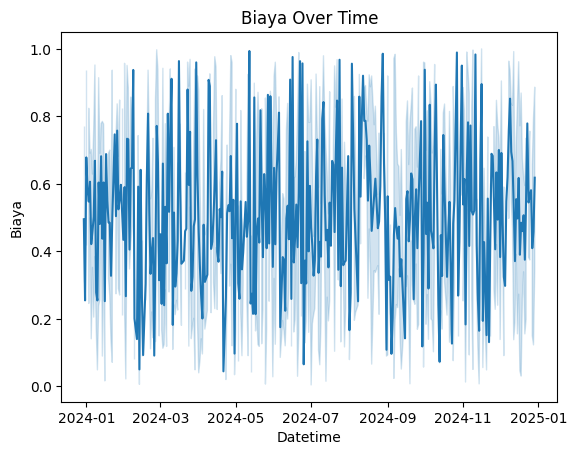

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Use 'Datetime' as the x-axis and a numerical column (e.g., 'Biaya' or 'Jumlah') as the y-axis
sns.lineplot(data=data, x='Datetime', y='Biaya')  # Replace 'Biaya' with your desired y-axis column
plt.title('Biaya Over Time')
plt.xlabel('Datetime')
plt.ylabel('Biaya')
plt.show()


In [47]:
data = data.dropna(subset=['Datetime', 'Biaya'])  # Replace 'Biaya' with the y-axis column
print(data.dtypes)


Datetime                       datetime64[ns]
Nomor Pajak                            object
Kategori Transaksi                      int64
Status Pembayaran                       int64
Kampanye                               object
Saluran Promosi                        object
Pelanggaran Lingkungan                  int64
Biaya                                 float64
Jumlah Respon                         float64
ROI                                   float64
Denda (Rp)                            float64
Emisi Karbon (ton CO2e)               float64
Penggunaan Energi (MWh)               float64
Keanekaragaman Karyawan (%)           float64
Jumlah                                float64
dtype: object


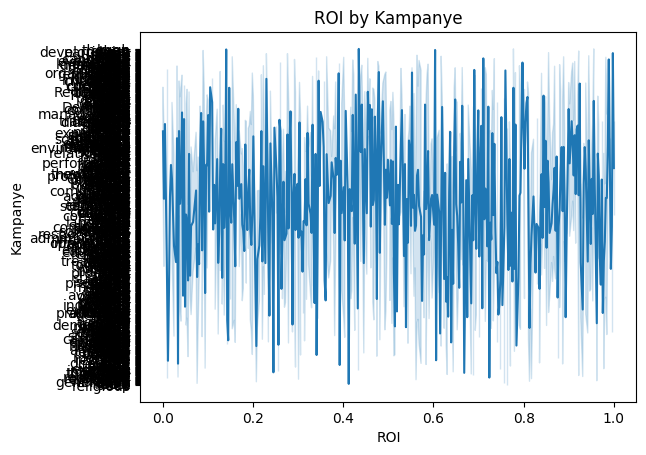

In [48]:
sns.lineplot(data=data, x='ROI', y='Kampanye')  # Replace with suitable columns
plt.title('ROI by Kampanye')
plt.show()


Step 6: Documentation
Ensure proper documentation following the guidelines in the uploaded document:

Include metadata as JSON or a README file.
Use tools for lineage tracking like MLflow.

In [50]:
import json

metadata = {
    "Dataset Name": "Preprocessed Financial Data",
    "Creation Date": "2024-12-31",
    "Source": "User-uploaded financial dataset",
    "Format": "CSV",
    "Description": "Processed financial data for data mining and analysis.",
    "Schema": {
        "Datetime": "datetime64[ns]",
        "Kategori Transaksi": "string",
        "Status Pembayaran": "string",
        "Biaya": "float",
        "Jumlah Respon": "int",
        "ROI": "float",
        "Denda (Rp)": "float",
        "Emisi Karbon (ton CO2e)": "float",
        "Penggunaan Energi (MWh)": "float",
        "Keanekaragaman Karyawan (%)": "float",
        "Jumlah": "float"
    }
}

# Save as a JSON file
with open('metadata.json', 'w') as f:
    json.dump(metadata, f, indent=4)


Implement Lineage Tracking with MLflow

In [26]:
pip install mlflow


  Using cached cachetools-5.5.0-py3-none-any.whl.metadata (5.3 kB)
  Using cached GitPython-3.1.43-py3-none-any.whl.metadata (13 kB)
  Using cached blinker-1.9.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached gitdb-4.0.11-py3-none-any.whl.metadata (1.2 kB)
  Using cached smmap-5.0.1-py3-none-any.whl.metadata (4.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.4/27.4 MB 1.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 3.2 MB/s eta 0:00:0000:0100:01
Using cached blinker-1.9.0-py3-none-any.whl (8.5 kB)
Using cached cachetools-5.5.0-py3-none-any.whl (9.5 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 629.7/629.7 kB 3.2 MB/s eta 0:00:00
Using cached GitPython-3.1.43-py3-none-any.whl (207 kB)
Using cached gitdb-4.0.11-py3-none-any.whl (62 kB)
Using cached smmap-5.0.1-py3-none-any.whl (24 kB)
Note: you may need to restart the kernel to use updated packages.


In [51]:
import os
import mlflow

# Use the current working directory for tracking
mlflow.set_tracking_uri(f"file://{os.getcwd()}/mlruns")

# Set the experiment
mlflow.set_experiment("financial_data_etl")


<Experiment: artifact_location=('file:///Users/nurwulanhandayani/Downloads/data dummy '
 'takel/mlruns/321384385206524322'), creation_time=1735584563237, experiment_id='321384385206524322', last_update_time=1735584563237, lifecycle_stage='active', name='financial_data_etl', tags={}>

In [52]:
with open('/tmp/test_write_permissions.txt', 'w') as f:
    f.write("Testing write permissions")


In [53]:
# Example MLflow logging
with mlflow.start_run():
    mlflow.log_param("Dataset Name", "Preprocessed Financial Data")
    mlflow.log_param("Creation Date", "2024-12-31")
    mlflow.log_param("Source", "User-uploaded financial dataset")
    mlflow.log_param("Format", "CSV")
    
    # Log the schema as an artifact
    with open("metadata.json", "w") as f:
        json.dump(metadata, f, indent=4)
    mlflow.log_artifact("metadata.json")

    # Log the processed dataset
    data.to_csv("processed_data.csv", index=False)
    mlflow.log_artifact("processed_data.csv")


In [54]:
def update_metadata(data, filename="metadata.json"):
    updated_metadata = {
        "Dataset Name": "Updated Financial Data",
        "Last Modified": pd.Timestamp.now().strftime("%Y-%m-%d %H:%M:%S"),
        "Record Count": len(data),
        "Columns": list(data.columns)
    }
    with open(filename, "w") as f:
        json.dump(updated_metadata, f, indent=4)

# Update metadata after processing
update_metadata(data)


In [55]:
import mlflow
import pandas as pd
import json

# Set the tracking URI and experiment
mlflow.set_tracking_uri("file:///tmp/mlruns")  # Update this path as needed
mlflow.set_experiment("financial_data_etl")

# Start a run
with mlflow.start_run(run_name="Data Cleaning and ETL"):
    # Log parameters
    mlflow.log_param("Dataset Name", "Preprocessed Financial Data")
    mlflow.log_param("Creation Date", "2024-12-31")

    # Log metrics (example metrics for illustrative purposes)
    mlflow.log_metric("Missing Values Count", 10)
    mlflow.log_metric("Total Rows", 1000)

    # Save metadata as an artifact
    metadata = {
        "Dataset Name": "Preprocessed Financial Data",
        "Creation Date": "2024-12-31",
        "Source": "User-uploaded financial dataset",
        "Format": "CSV",
        "Description": "Processed financial data for data mining and analysis."
    }
    with open("metadata.json", "w") as f:
        json.dump(metadata, f, indent=4)
    mlflow.log_artifact("metadata.json")

    # Save a sample processed dataset as an artifact
    sample_data = pd.DataFrame({"A": [1, 2, 3], "B": [4, 5, 6]})
    sample_data.to_csv("processed_sample.csv", index=False)
    mlflow.log_artifact("processed_sample.csv")
